In [1]:
%matplotlib widget

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg
from random import random
import math
from sympy import * 
from scipy.linalg import null_space
import matplotlib

In [3]:
# # function to run the Randomized Kaczmarz algorithm
# def RK(A, b):
#     " this function takes a matrix A and vector b as inputs and returns the sequence of iterates generated by the algorithm applied to Ax=b"

#     # generating probabilities of choosing the rows
#     probas = []
#     frob_norm_Atld = np.linalg.norm(A, ord='fro')
#     for i in range(A.shape[0]):
#         probas.append((np.linalg.norm(A[i,:], ord=2)**2)/(frob_norm_Atld**2))

    
#     path = []
       
#     for r in range(int(n_run)):
        
#         x = x_0
        
#         path.append(x)

#         for i in range(int(n_iter)):
#             # row_idx = np.random.randint(0,m) # to select rows uniformally at random
#             row_idx = int(np.random.choice(A.shape[0], 1, p=probas))  # to select rows with specified probability
#             if np.linalg.norm(A[row_idx,:])==0: # avoid zero rows
#                 continue
#             else:
#                 x = x + (b[row_idx] - np.dot(A[row_idx,:],x))/((np.linalg.norm(A[row_idx,:], ord=2))**2)*A[row_idx,:]
#                 path.append(x)
    
                
#         print("end run", r)

#     return(path)


In [4]:
# function to run the Randomized Kaczmarz algorithm
def RK(A, b):
    " this function takes a matrix A and vector b as inputs and returns the sequence of iterates generated by the algorithm applied to Ax=b"

    # generating probabilities of choosing the rows
    probas = []
    frob_norm_Atld = np.linalg.norm(A, ord='fro')
    for i in range(A.shape[0]):
        probas.append((np.linalg.norm(A[i,:], ord=2)**2)/(frob_norm_Atld**2))

    
    path = []
       
    x = x_0
        
    path.append(x)

    for i in range(int(n_iter)):
        # row_idx = np.random.randint(0,m) # to select rows uniformally at random
        row_idx = int(np.random.choice(A.shape[0], 1, p=probas))  # to select rows with specified probability
        if np.linalg.norm(A[row_idx,:])==0: # avoid zero rows
            continue
        else:
            x = x + (b[row_idx] - np.dot(A[row_idx,:],x))/((np.linalg.norm(A[row_idx,:], ord=2))**2)*A[row_idx,:]
            path.append(x)
    
    return(path)


### Showing limitting balls

#### Case of noisy matrix has rank=2
in that case, the matrix is full rank and any arbitrary selected point will be in the row space of the matrix

In [ ]:
# generate noisy data
noisy_A = np.array([[8/3, -1], [13/7,13/7], [-3/2,3]])
noisy_b = np.array([1,13,3])

# computing the smallest singular value of the noisy matrix
_, s, _ = np.linalg.svd(noisy_A)
sigma_min = min(s)


print("rank of noisy matrix is: ",np.linalg.matrix_rank(noisy_A))

rank of noisy matrix is:  2


In [ ]:
# compute the least squares solution of the noisy system
x_ls_tld = np.linalg.pinv(noisy_A)@noisy_b

In [ ]:
# Running the RK algorithm and generate the sequence of its iterates
  
n_iter = 40  # number of iterations
x_0 =  np.array([-2,5])  # starting point
path = RK(noisy_A,noisy_b)
path = np.array(path)

In [ ]:
# Generating arbitrary points
x1 = np.array([0.8, 2.8 ])
x2 = np.array([2.1, 1.3])
x3 = np.array([0.7, 1.5])

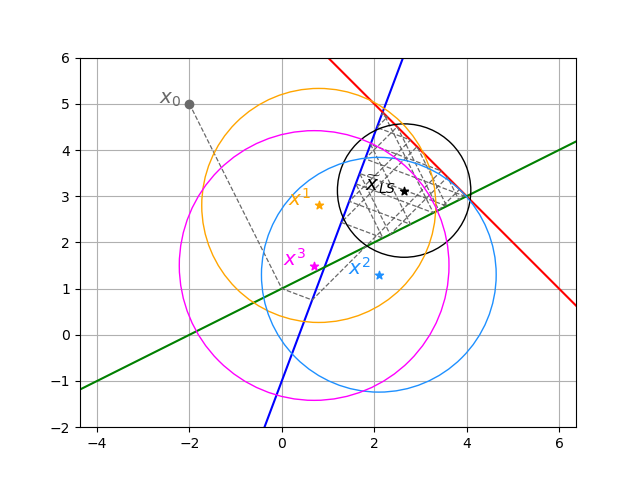

In [ ]:
############ Plotting

fig, ax = plt.subplots()

# plotting equations of noisy_A
y = np.linspace(-20,20,5)
x = [[] for i in range(noisy_A.shape[0])]
for i in range(noisy_A.shape[0]):
    for j in y:
        x[i].append((noisy_b[i]-noisy_A[i,1]*j)/noisy_A[i,0])

colors = ["blue",'red','green']
i=0
for list in x:
    ax.plot(list,y, c=colors[i], zorder=2)
    i += 1

# plotting path of the iterates
ax.plot(path[:,0], path[:,1], c='dimgrey', linestyle='--', linewidth=0.9)

ax.text(x_0[0], x_0[1], r'$x_0$'+"  ", fontsize='x-large', color='dimgrey', ha='right')
ax.scatter(x_0[0], x_0[1], marker='o', c='dimgrey', zorder=2)

# cercle around the least squares solution of the noisy system
ax.scatter(x_ls_tld[0], x_ls_tld[1],  c='black', marker='*', zorder=2)
ax.text(x_ls_tld[0], x_ls_tld[1], " "+r'$\widetilde x_{LS}$'+"  ", fontsize='x-large', color='black', ha='right')
ax.add_patch(plt.Circle((x_ls_tld[0], x_ls_tld[1]), np.linalg.norm(noisy_A @ x_ls_tld-noisy_b, ord=2)/sigma_min, fill = False, color='black', zorder=2))

# cercle around x1
ax.scatter(x1[0], x1[1], color='orange', marker='*',  zorder=2)
ax.text(x1[0], x1[1], " "+r'$x^1$'+"  ", fontsize='x-large', ha='right', color='orange')
ax.add_patch(plt.Circle((x1[0], x1[1]), np.linalg.norm(noisy_A @ x1-noisy_b, ord=2)/sigma_min, fill = False, zorder=2, color='orange'))

# cercle around x2
ax.scatter(x2[0], x2[1],  zorder=2, color='dodgerblue', marker='*')
ax.text(x2[0], x2[1], " "+r'$x^2$'+"  ", fontsize='x-large', ha='right', color='dodgerblue')
ax.add_patch(plt.Circle((x2[0], x2[1]), np.linalg.norm(noisy_A @ x2-noisy_b, ord=2)/sigma_min, fill = False, zorder=2, color='dodgerblue'))

# cercle around x3
ax.scatter(x3[0], x3[1],  zorder=2, color='magenta', marker='*')
ax.text(x3[0], x3[1], " "+r'$x^3$'+"  ", fontsize='x-large', ha='right', color='magenta')
ax.add_patch(plt.Circle((x3[0], x3[1]), np.linalg.norm(noisy_A @ x3-noisy_b, ord=2)/sigma_min, fill = False, zorder=2, color='magenta'))


ax.axis('equal')
plt.ylim(-2,6)
plt.xlim(-4,6)
ax.grid(zorder=0)

#### Case of noisy matrix has rank=1

In [94]:
# generate noisy data
noisy_A = np.array([[0.06,0.18],
       [0.1,0.3],
       [ -0.2,  -0.6]])
noisy_b = np.array([[1],
       [2.5],
       [3]])

# computing the smallest singular value of the noisy matrix
_, s, _ = np.linalg.svd(noisy_A)
s = s = [x for x in s if x>1e-8]
sigma_min = min(s)


print("rank of noisy matrix is: ",np.linalg.matrix_rank(noisy_A))

rank of noisy matrix is:  1


In [95]:
# compute the least squares solution of the noisy system
x_ls_tld = np.linalg.pinv(noisy_A)@noisy_b
x_ls_tld = x_ls_tld.reshape(2,)

In [96]:
# Running the RK algorithm and generate the sequence of its iterates
  
n_iter = 40  # number of iterations
x_0 =  np.array([0,60])  # starting point
path = RK(noisy_A,noisy_b)
path = np.array(path)

In [97]:
# Generating arbitrary points
x1 = np.array([-40,40])
x2 = np.array([-20,20]) 
x3 = np.array([30,-30])

In [98]:
# projection of x_0 on the null space of noisy_A
null_spaceNoisyA = null_space(noisy_A)
orthogonal_basis = null_spaceNoisyA
dot_product_values = (x_0.T) @ orthogonal_basis
mult_basis = np.zeros(orthogonal_basis.shape)
for i in range(len(dot_product_values)):
    mult_basis[:,i] = dot_product_values[i]*orthogonal_basis[:,i]
x0_n =  np.sum( mult_basis , axis=1)

# projection of x1 on the row space of noisy_A
dot_product_values = (x1.T) @ orthogonal_basis
mult_basis = np.zeros(orthogonal_basis.shape)
for i in range(len(dot_product_values)):
    mult_basis[:,i] = dot_product_values[i]*orthogonal_basis[:,i]
x1_n =  np.sum( mult_basis , axis=1)
x1_r = x1 - x1_n

# projection of x2 on the row space of noisy_A
dot_product_values = (x2.T) @ orthogonal_basis
mult_basis = np.zeros(orthogonal_basis.shape)
for i in range(len(dot_product_values)):
    mult_basis[:,i] = dot_product_values[i]*orthogonal_basis[:,i]
x2_n =  np.sum( mult_basis , axis=1)
x2_r = x2 - x2_n

# projection of x3 on the row space of noisy_A
dot_product_values = (x3.T) @ orthogonal_basis
mult_basis = np.zeros(orthogonal_basis.shape)
for i in range(len(dot_product_values)):
    mult_basis[:,i] = dot_product_values[i]*orthogonal_basis[:,i]
x3_n =  np.sum( mult_basis , axis=1)
x3_r = x3 - x3_n

C:\Users\soumi\AppData\Local\Temp\ipykernel_3168\3033543038.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


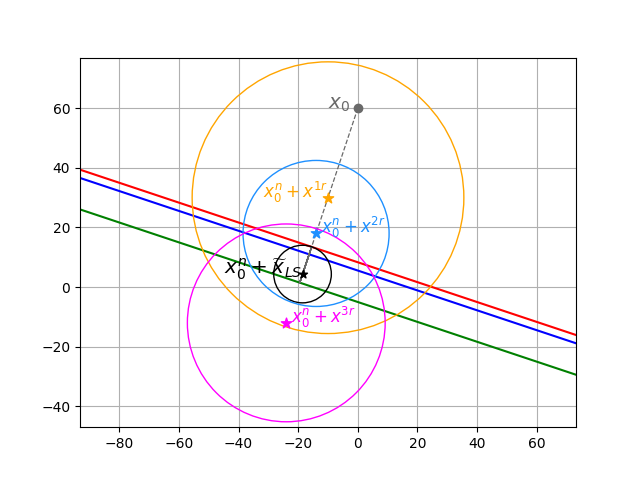

In [99]:
############ Plotting

fig, ax = plt.subplots()

# plotting equations of noisy_A
y = np.linspace(-80,80,5)
x = [[] for i in range(noisy_A.shape[0])]
for i in range(noisy_A.shape[0]):
    for j in y:
        x[i].append((noisy_b[i]-noisy_A[i,1]*j)/noisy_A[i,0])

colors = ["blue",'red','green']
i=0
for list in x:
    ax.plot(list,y, c=colors[i], zorder=2)
    i += 1

# plotting path of the iterates
ax.plot(path[:,0], path[:,1], c='dimgrey', linestyle='--', linewidth=0.9)
ax.text(x_0[0], x_0[1], r'$x_0$'+"  ", fontsize='x-large', color='dimgrey', ha='right')
ax.scatter(x_0[0], x_0[1], marker='o', c='dimgrey', zorder=2)

# cercle around x_ls_tld+x0_n
center = x0_n + x_ls_tld
ax.scatter(center[0], center[1],  c='black', marker='*', zorder=2)
ax.text(center[0], center[1], r'$x_0^{n}+\widetilde x_{LS}$', fontsize='x-large', color='black', ha='right')
ax.add_patch(plt.Circle((center[0], center[1]), np.linalg.norm(noisy_A @ x_ls_tld-noisy_b, ord=2)/sigma_min, fill = False, color='black', zorder=2))


# cercle around x0_n + x1_r
center = x0_n + x1_r
ax.scatter(center[0], center[1],  zorder=2, color='orange', marker='*', s=60)
ax.text(center[0], center[1], ""+r'$x_0^{n}+x^{1 r}$'+"", fontsize='large', ha='right', color='orange')
ax.add_patch(plt.Circle((center[0], center[1]), np.linalg.norm(noisy_A @ x1 - noisy_b, ord=2)/sigma_min, fill = False, zorder=2, color='orange'))


# cercle around x0_n + x2_r
center = x0_n + x2_r
ax.scatter(center[0], center[1],  zorder=2, color='dodgerblue', marker='*', s=60)
ax.text(center[0], center[1], " "+r'$x_0^{n}+x^{2 r}$'+"", fontsize='large', ha='left', color='dodgerblue')
ax.add_patch(plt.Circle((center[0], center[1]), np.linalg.norm(noisy_A @ x2 - noisy_b, ord=2)/sigma_min, fill = False, zorder=2, color='dodgerblue'))

# cercle around x0_n + x3_r
center = x0_n + x3_r
ax.scatter(center[0], center[1],  zorder=2, color='magenta', marker='*', s=60)
ax.text(center[0], center[1], " "+r'$x_0^{n}+x^{3 r}$'+"", fontsize='large', ha='left', color='magenta')
ax.add_patch(plt.Circle((center[0], center[1]), np.linalg.norm(noisy_A @ x3 - noisy_b, ord=2)/sigma_min, fill = False, zorder=2, color='magenta'))


ax.axis('equal')
plt.ylim(-47,77)
plt.xlim(-80,60)
ax.grid(zorder=0)

### Result using different starting points

#### Case of noisy matrix has rank=2

In [104]:
# generate noisy data

noisy_A = np.array([[-1.17697043,  0.17630935],
       [-1.0293268 , -0.79887474],
       [ 1,  0.35]])
noisy_b = np.array([[1.22768142],
       [0.92979582],
       [3.5]])

print("rank of noisy matrix is: ",np.linalg.matrix_rank(noisy_A))

rank of noisy matrix is:  2


In [105]:
# computing the smallest singular value of the noisy matrix
_, s, _ = np.linalg.svd(noisy_A)
s = s = [x for x in s if x>1e-8]
sigma_min = min(s)

In [106]:
# Generate two arbitrary starting points
x01 = np.array([-20,10])
x02 = np.array([20,-5])

# Generate two arbitrary reference points
x1 = np.array([-2.23522069,  1.45201193])
x2 = np.array([-0.64770123, -0.49563703])

In [107]:
# projection of x01 on the null space of noisy_A
null_spaceNoisyA = null_space(noisy_A)
orthogonal_basis = null_spaceNoisyA
dot_product_values = (x01.T) @ orthogonal_basis
mult_basis = np.zeros(orthogonal_basis.shape)
for i in range(len(dot_product_values)):
    mult_basis[:,i] = dot_product_values[i]*orthogonal_basis[:,i]
x01_n =  np.sum( mult_basis , axis=1)


# projection of x02 on the null space of noisy_A
dot_product_values = (x02.T) @ orthogonal_basis
mult_basis = np.zeros(orthogonal_basis.shape)
for i in range(len(dot_product_values)):
    mult_basis[:,i] = dot_product_values[i]*orthogonal_basis[:,i]
x02_n =  np.sum( mult_basis , axis=1)

# projection of x1 on the row space of noisy_A
dot_product_values = (x1.T) @ orthogonal_basis
mult_basis = np.zeros(orthogonal_basis.shape)
for i in range(len(dot_product_values)):
    mult_basis[:,i] = dot_product_values[i]*orthogonal_basis[:,i]
x1_n =  np.sum( mult_basis , axis=1)
x1_r = x1 - x1_n

# projection of x2 on the row space of noisy_A
dot_product_values = (x2.T) @ orthogonal_basis
mult_basis = np.zeros(orthogonal_basis.shape)
for i in range(len(dot_product_values)):
    mult_basis[:,i] = dot_product_values[i]*orthogonal_basis[:,i]
x2_n =  np.sum( mult_basis , axis=1)
x2_r = x2 - x2_n

In [108]:
# Running the RK algorithm and generate the sequence of its iterates

n_iter = 50  # number of iterations

x_0 = x01
path_x01 = RK(noisy_A,noisy_b)
path_x01 = np.array(path_x01)

x_0 = x02
path_x02 = RK(noisy_A,noisy_b)
path_x02 = np.array(path_x02)

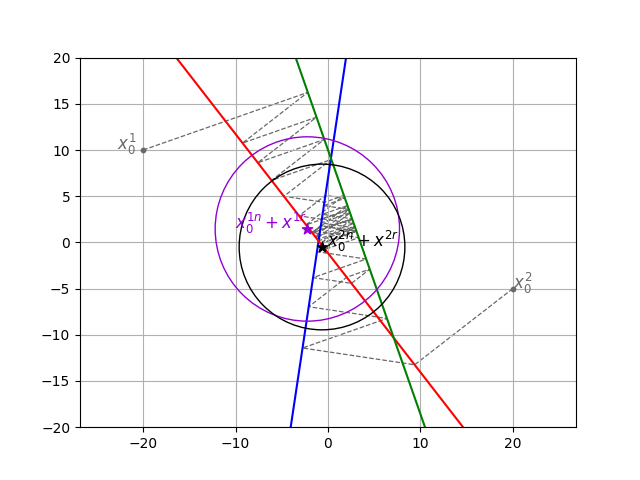

In [110]:
######## Plotting
fig, ax = plt.subplots()

# plotting equations of noisy_A
y = np.linspace(-20,20,5)
x = [[] for i in range(noisy_A.shape[0])]
for i in range(noisy_A.shape[0]):
    for j in y:
        x[i].append((noisy_b[i]-noisy_A[i,1]*j)/noisy_A[i,0])

colors = ["blue",'red','green']
i=0
for list in x:
    ax.plot(list,y, c=colors[i])
    i += 1

# plotting path1
ax.plot(path_x01[0:n_iter, 0], path_x01[0:n_iter, 1], c='dimgrey', linestyle='--', linewidth=0.9, zorder=0)
ax.text(x01[0], x01[1], r'$x_{0}^1$'+"  ", fontsize='large', color='dimgrey', ha='right')
ax.scatter(x01[0], x01[1], marker='o', c='dimgrey', zorder=2, s=10)

# plotting path2
ax.plot(path_x02[0:n_iter, 0], path_x02[0:n_iter, 1], c='dimgrey', linestyle='--', linewidth=0.9, zorder=1)
ax.text(x02[0], x02[1], r'$x_{0}^2$'+"  ", fontsize='large', color='dimgrey', ha='left')
ax.scatter(x02[0], x02[1], marker='o', c='dimgrey', zorder=2, s=10)



# cercle around x01_n + x1_r
center = x01_n + x1_r
ax.scatter(center[0], center[1],  zorder=2, color='darkviolet', marker='*', s=60)
ax.text(center[0], center[1], ""+r'$x_0^{1 n}+x^{1 r}$'+"", fontsize='large', ha='right', color='darkviolet')
ax.add_patch(plt.Circle((center[0], center[1]), np.linalg.norm(noisy_A @ x1 - noisy_b, ord=2)/sigma_min, fill = False, zorder=2, color='darkviolet'))


# cercle around x02_n + x2_r
center = x02_n + x2_r
ax.scatter(center[0], center[1],  zorder=2, color='black', marker='*', s=60)
ax.text(center[0], center[1], " "+r'$x_0^{2 n}+x^{2 r}$'+"", fontsize='large', ha='left', color='black')
ax.add_patch(plt.Circle((center[0], center[1]), np.linalg.norm(noisy_A @ x2 - noisy_b, ord=2)/sigma_min, fill = False, zorder=2, color='black'))

ax.axis('equal')
plt.ylim(-20,20)
plt.xlim(-25,25)
ax.grid(zorder=0)


#### Case of noisy matrix has rank=1

In [111]:
# generate noisy data

noisy_A = np.array([[-0.06,-0.18],
       [-0.1,-0.3],
       [ 0.2,  0.6]])
noisy_b = np.array([[1],
       [2.5],
       [3]])

print("rank of noisy matrix is: ",np.linalg.matrix_rank(noisy_A))

rank of noisy matrix is:  1


In [112]:
# computing the smallest singular value of the noisy matrix
_, s, _ = np.linalg.svd(noisy_A)
s = s = [x for x in s if x>1e-8]
sigma_min = min(s)

In [113]:
# Generate two arbitrary starting points
x01 = np.array([-10,28])
x02 = np.array([15.8,12.3])

# Generate two arbitrary reference points
x1 = np.random.randn(2,)
x2 = np.random.randn(2,)

In [114]:
# projection of x01 on the null space of noisy_A
null_spaceNoisyA = null_space(noisy_A)
orthogonal_basis = null_spaceNoisyA
dot_product_values = (x01.T) @ orthogonal_basis
mult_basis = np.zeros(orthogonal_basis.shape)
for i in range(len(dot_product_values)):
    mult_basis[:,i] = dot_product_values[i]*orthogonal_basis[:,i]
x01_n =  np.sum( mult_basis , axis=1)


# projection of x02 on the null space of noisy_A
dot_product_values = (x02.T) @ orthogonal_basis
mult_basis = np.zeros(orthogonal_basis.shape)
for i in range(len(dot_product_values)):
    mult_basis[:,i] = dot_product_values[i]*orthogonal_basis[:,i]
x02_n =  np.sum( mult_basis , axis=1)

# projection of x1 on the row space of noisy_A
dot_product_values = (x1.T) @ orthogonal_basis
mult_basis = np.zeros(orthogonal_basis.shape)
for i in range(len(dot_product_values)):
    mult_basis[:,i] = dot_product_values[i]*orthogonal_basis[:,i]
x1_n =  np.sum( mult_basis , axis=1)
x1_r = x1 - x1_n

# projection of x2 on the row space of noisy_A
dot_product_values = (x2.T) @ orthogonal_basis
mult_basis = np.zeros(orthogonal_basis.shape)
for i in range(len(dot_product_values)):
    mult_basis[:,i] = dot_product_values[i]*orthogonal_basis[:,i]
x2_n =  np.sum( mult_basis , axis=1)
x2_r = x2 - x2_n

In [115]:
# Running the RK algorithm and generate the sequence of its iterates

n_iter = 50  # number of iterations

x_0 = x01
path_x01 = RK(noisy_A,noisy_b)
path_x01 = np.array(path_x01)

x_0 = x02
path_x02 = RK(noisy_A,noisy_b)
path_x02 = np.array(path_x02)

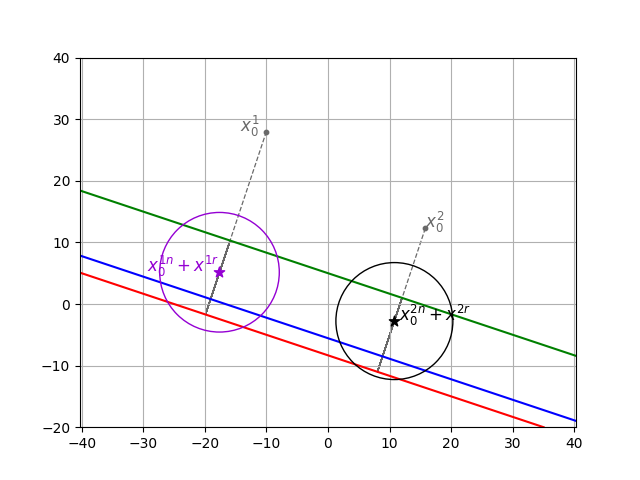

In [116]:
######## Plotting
fig, ax = plt.subplots()

# plotting equations of noisy_A
y = np.linspace(-20,20,5)
x = [[] for i in range(noisy_A.shape[0])]
for i in range(noisy_A.shape[0]):
    for j in y:
        x[i].append((noisy_b[i]-noisy_A[i,1]*j)/noisy_A[i,0])

colors = ["blue",'red','green']
i=0
for list in x:
    ax.plot(list,y, c=colors[i])
    i += 1

# plotting path1
ax.plot(path_x01[0:n_iter, 0], path_x01[0:n_iter, 1], c='dimgrey', linestyle='--', linewidth=0.9, zorder=0)
ax.text(x01[0], x01[1], r'$x_{0}^1$'+"  ", fontsize='large', color='dimgrey', ha='right')
ax.scatter(x01[0], x01[1], marker='o', c='dimgrey', zorder=2, s=10)

# plotting path2
ax.plot(path_x02[0:n_iter, 0], path_x02[0:n_iter, 1], c='dimgrey', linestyle='--', linewidth=0.9, zorder=1)
ax.text(x02[0], x02[1], r'$x_{0}^2$'+"  ", fontsize='large', color='dimgrey', ha='left')
ax.scatter(x02[0], x02[1], marker='o', c='dimgrey', zorder=2, s=10)



# cercle around x01_n + x1_r
center = x01_n + x1_r
ax.scatter(center[0], center[1],  zorder=2, color='darkviolet', marker='*', s=60)
ax.text(center[0], center[1], ""+r'$x_0^{1 n}+x^{1 r}$'+"", fontsize='large', ha='right', color='darkviolet')
ax.add_patch(plt.Circle((center[0], center[1]), np.linalg.norm(noisy_A @ x1 - noisy_b, ord=2)/sigma_min, fill = False, zorder=2, color='darkviolet'))


# cercle around x02_n + x2_r
center = x02_n + x2_r
ax.scatter(center[0], center[1],  zorder=2, color='black', marker='*', s=60)
ax.text(center[0], center[1], " "+r'$x_0^{2 n}+x^{2 r}$'+"", fontsize='large', ha='left', color='black')
ax.add_patch(plt.Circle((center[0], center[1]), np.linalg.norm(noisy_A @ x2 - noisy_b, ord=2)/sigma_min, fill = False, zorder=2, color='black'))

ax.axis('equal')
plt.ylim(-20,40)
plt.xlim(-40,40)
ax.grid(zorder=0)
